In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import mne

%matplotlib inline

plt.close('all')
bids_root = pathlib.Path('/storage/store2/data/Omega')

Reading 0 ... 719999  =      0.000 ...   300.000 secs...
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.853 (s)


/tmp/ipykernel_47553/3986382834.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/dameeg/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


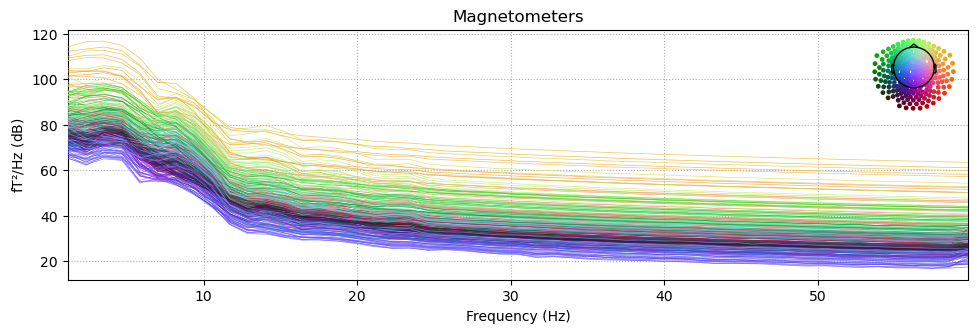

In [2]:
raw_path = os.path.join(bids_root, "sub-CONP0173/ses-02/meg/sub-CONP0173_ses-02_task-rest_run-01_meg.ds")
raw = mne.io.read_raw_ctf(raw_path, verbose=False).load_data()
raw.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.853 (s)


/tmp/ipykernel_47553/4240146324.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_notch.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/dameeg/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


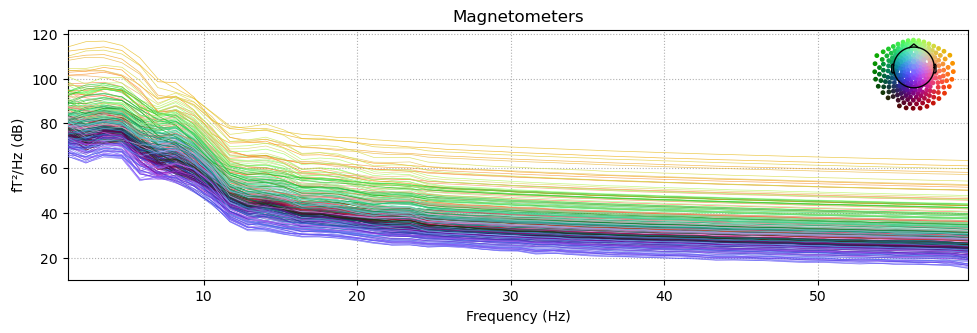

In [3]:
# Notch filter
raw_notch = raw.copy().notch_filter(60, verbose=False)
raw_notch.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.853 (s)


/tmp/ipykernel_47553/33260064.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_filter.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/dameeg/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


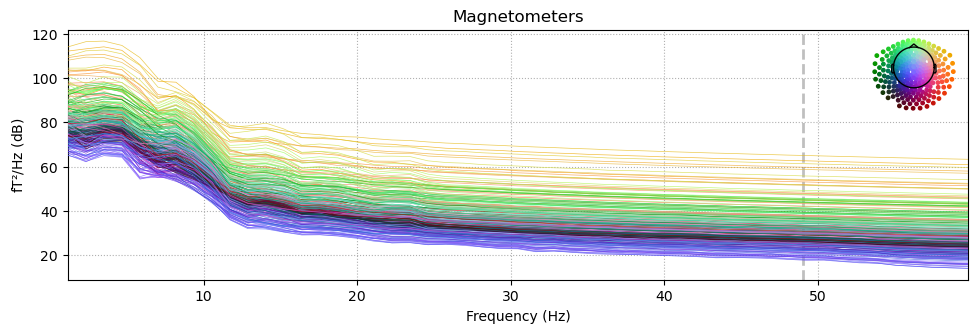

In [4]:
# Bandpass fitler
raw_filter = raw_notch.copy().filter(0.1, 49, verbose=False)
raw_filter.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Using data from preloaded Raw for 28 events and 24001 original time points (prior to decimation) ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_47553/4237151012.py:13: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochs.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/dameeg/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


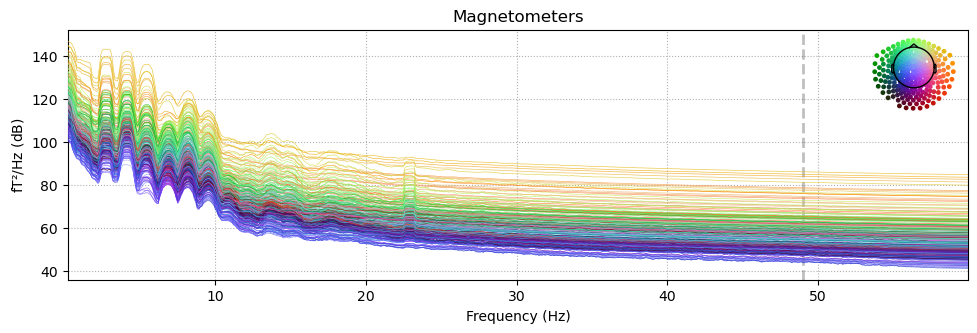

In [5]:
# Epochs
stop = raw_filter.times[-1] - 10
events = mne.make_fixed_length_events(
            raw_filter,
            id=3000,
            start=0,
            duration=10,
            overlap=0,
            stop=stop,
        )
event_id = dict(rest=3000)
epochs = mne.Epochs(raw_filter, events, event_id, tmin=0, tmax=10, baseline=None, decim=12)
epochs.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 10.240 (s)


/tmp/ipykernel_47553/1299109413.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_resample.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/dameeg/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


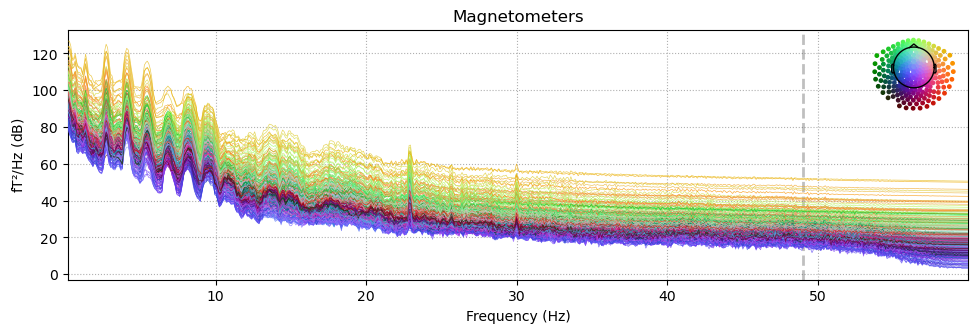

In [6]:
# Resample
raw_resample = raw_filter.copy().resample(200)
raw_resample.compute_psd(fmin=0.1, fmax=60, picks = 'meg').plot()